In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
df_ccf = pd.read_csv("C:\\Users\\siskounen\\Documents\\Credit_Card_Fraud\\data_fraud.csv" , sep=',')

In [3]:
df_ccf.head()


,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


<AxesSubplot:xlabel='TARGET'>

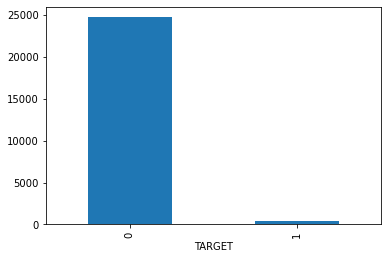

In [4]:
(df_ccf.groupby('TARGET')
   ['ID'].nunique()
   .plot.bar()
)

The class we are looking to predict is the one that corresponds to credit card fraud that is worth 1 in the $TARGET$ column. We notice that this class is very low in our dataset, so there is a problem of class imbalance. To overcome this problem, we will put weights on each of the classes using $class\_weight$.

First of all, we will retain only the quantitative variables of our dataset in the prediction of the $fraud$ class.

In [5]:
X = df_ccf[['NO_OF_CHILD','INCOME','FLAG_MOBIL','WORK_PHONE','PHONE','E_MAIL','FAMILY SIZE', 'BEGIN_MONTH','AGE','YEARS_EMPLOYED']]
Y = df_ccf[['TARGET']]


In [6]:
random_state = np.random.RandomState(0)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.4,random_state=10)

## Linear regression:

In [7]:
clf=LinearRegression()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.005276566154889806

## Logistic regression

In [8]:
lr = LogisticRegression(random_state=10).fit(X,Y)
print("Regression Logistic score:",lr.score(X,Y))


Regression Logistic score: 0.983209994429856


C:\Users\siskounen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Roc curve for Logistic Regression

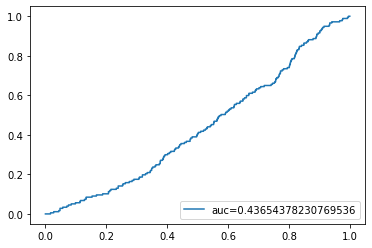

In [9]:
y_pred_proba=lr.predict_proba(x_test)[::,1]
fpr , tpr, _ =metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label= "auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Confusion matrix for logistic regression

Confusion matrix,without normalization
[[9877    0]
 [ 177    0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


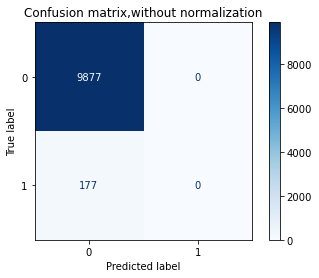

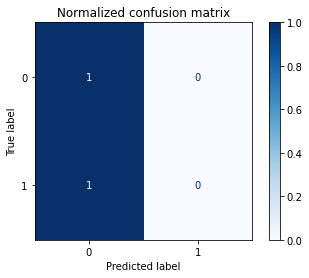

In [10]:
titles_options=[("Confusion matrix,without normalization" ,None),("Normalized confusion matrix","true")]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
    lr,
    x_test,
    y_test,
    ##display_lables = class_names,
    cmap = plt.cm.Blues,
    normalize = normalize,
    )
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

##  Logistic Regression with penalty L2

In [11]:
lr_l2 = LogisticRegression(penalty='l2',C=0.01)
lr_l2.fit(x_train,y_train)
y_pred = lr_l2.predict(x_test)

C:\Users\siskounen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
print("Regression Logistic with penalty L2 score:", metrics.accuracy_score(y_test,y_pred))

Regression Logistic with penalty L2 score: 0.9823950666401432


### Roc Curve for Logistic Regression with penalty L2

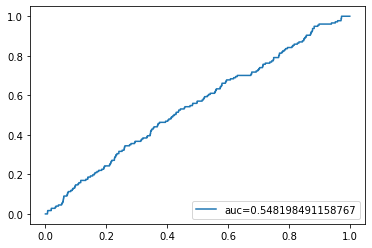

In [13]:
y_pred_proba=lr_l2.predict_proba(x_test)[::,1]
fpr , tpr, _ =metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label= "auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Confusion Matrix for Logistic Regression with penalty L2

Confusion matrix,without normalization
[[9877    0]
 [ 177    0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


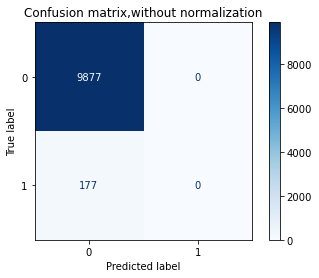

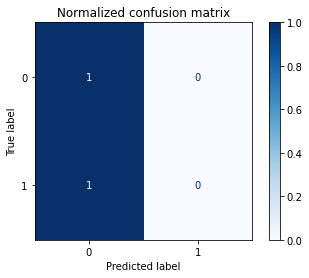

In [14]:
titles_options=[("Confusion matrix,without normalization" ,None),("Normalized confusion matrix","true")]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
    lr_l2,
    x_test,
    y_test,
    ##display_lables = class_names,
    cmap = plt.cm.Blues,
    normalize = normalize,
    )
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

## SVM

In [15]:
classifier = OneVsRestClassifier(svm.SVC(kernel="rbf" , probability=True,random_state=random_state))
y_score = classifier.fit(x_train, y_train).decision_function(x_test)
y_score

array([-0.99969571, -1.0004783 , -1.00041676, ..., -1.00006543,
       -1.00041662, -1.00047877])

### Roc Curve for SVM

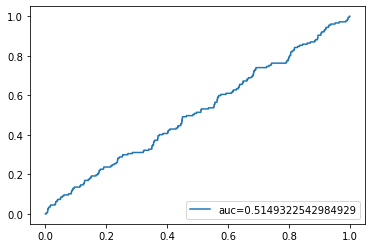

In [16]:
y_pred_proba=classifier.predict_proba(x_test)[::,1]
fpr , tpr, _ =metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label= "auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Confusion Matrix for SVM

Confusion matrix,without normalization
[[9877    0]
 [ 177    0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


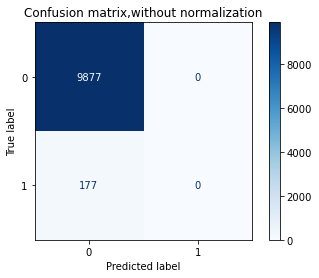

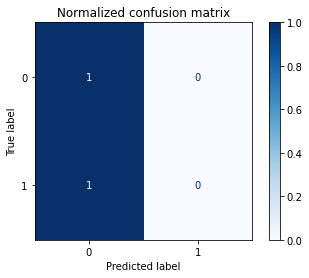

In [17]:
titles_options=[("Confusion matrix,without normalization" ,None),("Normalized confusion matrix","true")]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    x_test,
    y_test,
    ##display_lables = class_names,
    cmap = plt.cm.Blues,
    normalize = normalize,
    )
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
    
plt.show()